# Installing Sentinel Hub Python Library

In [ ]:
pip install sentinelhub

# Loading Client Credentials

In [ ]:
CLIENT_ID = '955627be-1511-4ffb-b60f-7249f2d7607d'
CLIENT_SECRET = 'bT2O;*|zTr1~4:.w8;6IDj<yz/|-rLl<x1R./08]'

In [ ]:
from sentinelhub import SHConfig

config = SHConfig()

config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET

if not config.sh_client_id or not config.sh_client_secret:
  print('Please provide credentials to use Process API.')

# Importing Libraries

In [ ]:
from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

# Defining Region of Interest

In [ ]:
coords = (73.066344, 33.628628, 73.191675, 33.7192)

resolution = 30

bbox = BBox(bbox=coords, crs=CRS.WGS84)
image_size = bbox_to_dimensions(bbox, resolution=resolution)

print(f'Image shape at {resolution} m resolution: {image_size}')

Image shape at 30 m resolution: (393, 328)


# Single-Date Satellite Image Acquisition (True Color Composite)

In [ ]:
evalscript = """
//VERSION=3

function setup() {
  return {
    input: ["B02", "B03", "B04"],
    output: { bands: 3 }
  };
}

function evaluatePixel(sample) {
  return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
}
"""

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=('2022-12-01', '2023-01-31'),
        ),
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF),
    ],
    bbox=bbox,
    size=image_size,
    config=config
)

response = request.get_data()

In [ ]:
# How to Plot the Image

from typing import Any, Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np


def plot_image(
    image: np.ndarray, factor: float = 1.0, clip_range: Optional[Tuple[float, float]] = None, **kwargs: Any
) -> None:
    """Utility function for plotting RGB images."""
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
response[0].shape

(328, 393, 3)

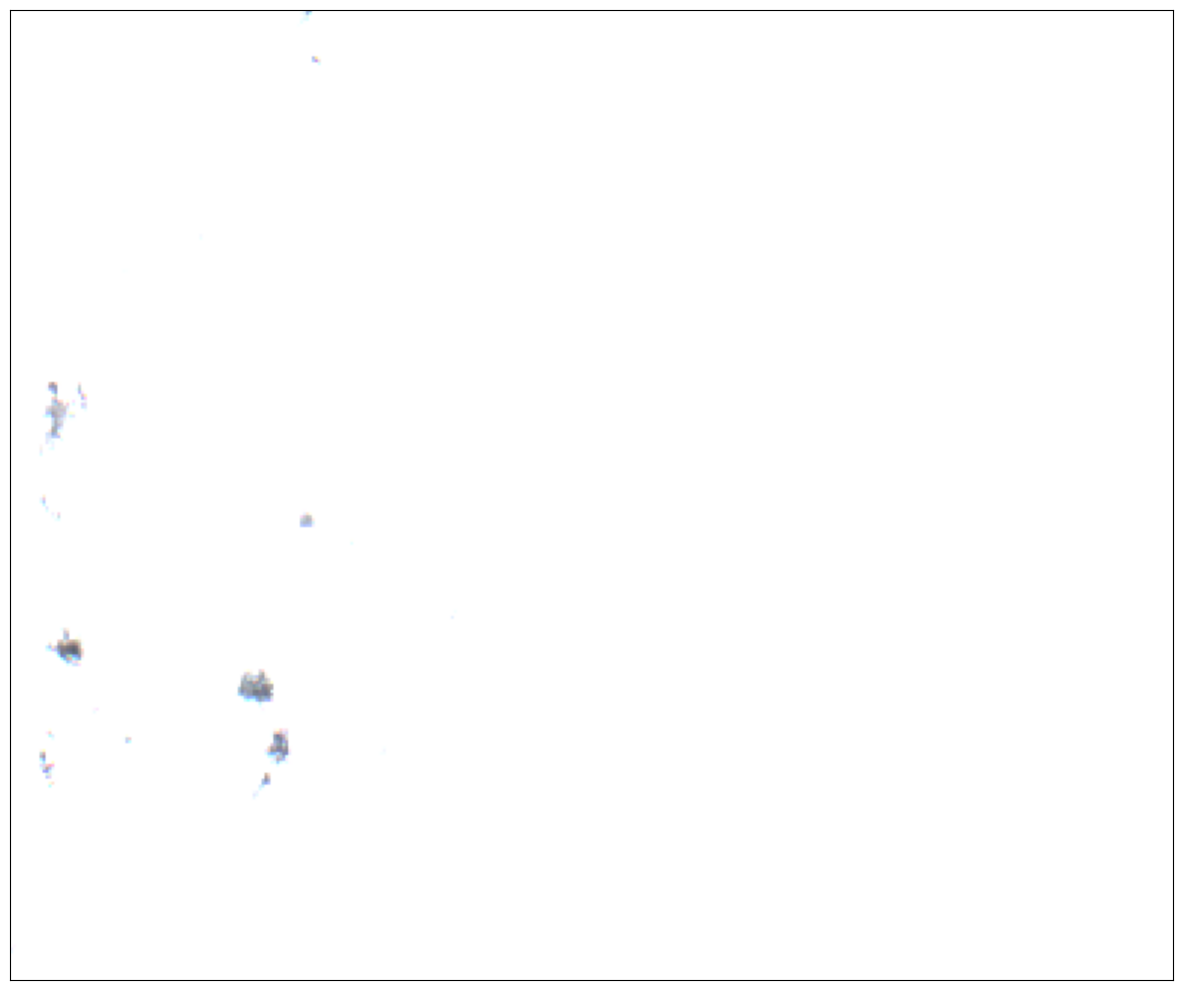

In [ ]:
plot_image(response[0], 2.5/255, (0,1))

# Least Cloudy Single Date Acquisition (True Color Composite)

In [ ]:
evalscript = """
//VERSION=3

function setup() {
  return {
    input: ["B02", "B03", "B04"],
    output: { bands: 3 }
  };
}

function evaluatePixel(sample) {
  return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
}
"""

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=('2022-12-01', '2023-01-31'),
            other_args={"dataFilter": {"mosaickingOrder": "leastCC"}}
        ),
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF),
    ],
    bbox=bbox,
    size=image_size,
    config=config
)

response = request.get_data()

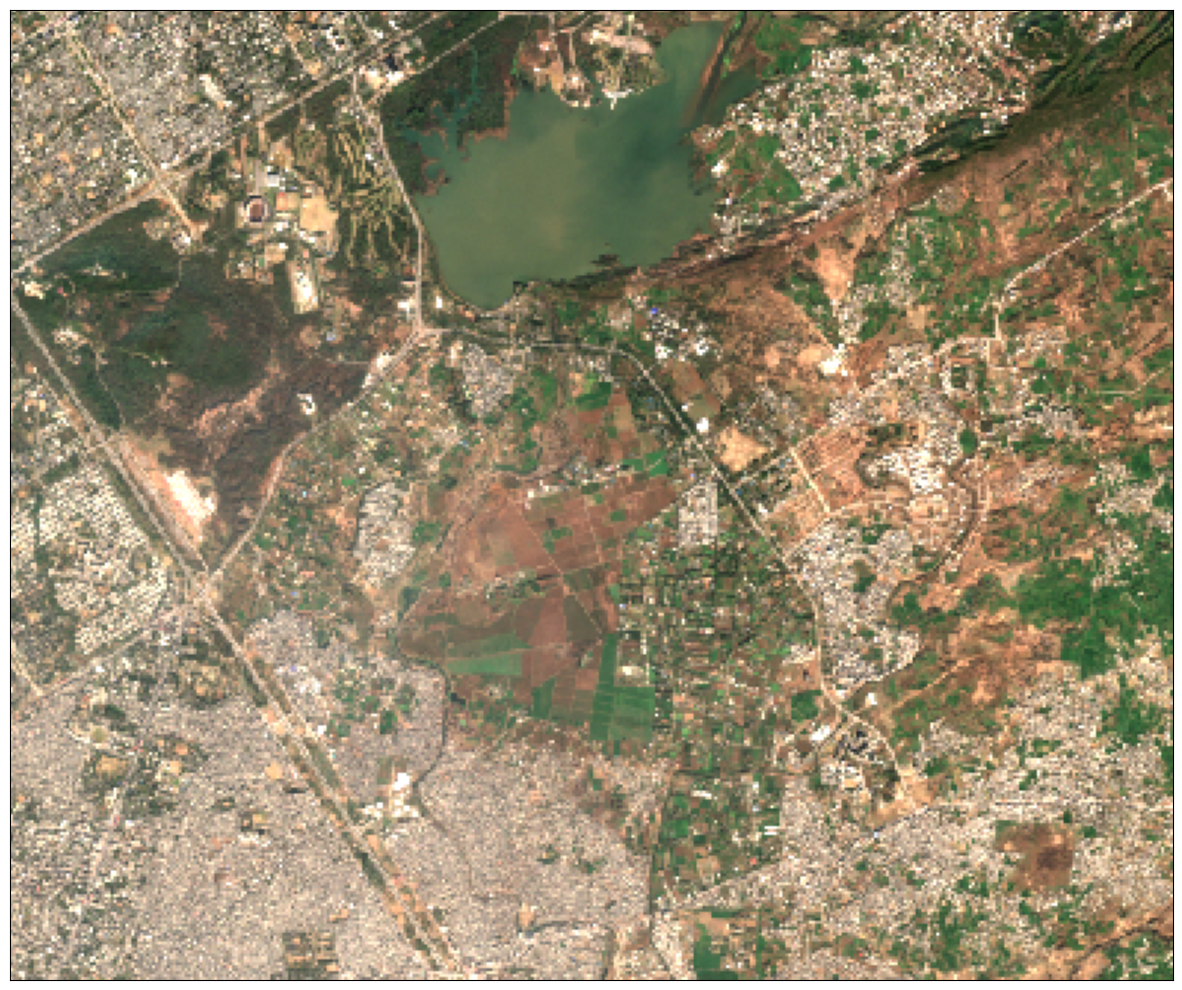

In [ ]:
plot_image(response[0], 2.5/255, (0,1))

# Other Available Data Collections

In [ ]:
for collection in DataCollection.get_available_collections():
  print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT_MSS_L1
DataCollection.LANDSAT_TM_L1
DataCollection.LANDSAT_TM_L2
DataCollection.LANDSAT_ETM_L1
DataCollection.LANDSAT_ETM_L2
DataCollection.LANDSAT_OT_L1
DataCollection.LANDSAT_OT_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR
DataCollection.HARMONIZED_LANDSAT_SENTINEL
